In [1]:
from docx import Document
import spacy
from spacy_syllables import SpacySyllables
from string import punctuation
import matplotlib.pyplot as plt

In [2]:
nlp = spacy.load("en_core_web_md")

/Users/lukas/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nlp.add_pipe("syllables", after="tagger")

In [4]:
document = Document('./../Linss-Lukas-ba.docx') 
document2 = Document('./../Bachelor_Thesis_stefan.docx')

In [5]:
bachelor_thesis1 = ''.join([p.text for p in document.paragraphs if len(p.text) >= 100])
bachelor_thesis2 = ''.join([p.text for p in document2.paragraphs if len(p.text) >= 100])


In [6]:
doc = nlp(bachelor_thesis1)
doc2 = nlp(bachelor_thesis2)

In [7]:
def fre_score(total_words, total_sentences, total_syllables):
    return 206.835 - 1.015 * (total_words / total_sentences) - 84.6 * (total_syllables / total_words)
    #206.835 - 1.015 * (total_words / total_sentences) - 84.6 * (total_syllables / total_words) - Flesch reading ease
    #0.39 * (total_words / total_sentences) + 11.8 * (total_syllables / total_words) - 15.59 - Flesch–Kincaid grade level


In [8]:
running_words = 0
running_syllables = 0
running_sentences = 0
running_fre_scores = {}

for i, sent in enumerate(doc.sents):
    running_sentences += 1
    for token in sent:
        running_words += 1
        running_syllables += token._.syllables_count if token.text not in punctuation and token._.syllables_count != None else 0
    running_fre_scores[i] = fre_score(running_words, running_sentences, running_syllables)


running_words = 0
running_syllables = 0
running_sentences = 0
running_fre_scores2 = {}

for i, sent in enumerate(doc2.sents):
    running_sentences += 1
    for token in sent:
        running_words += 1
        running_syllables += token._.syllables_count if token.text not in punctuation and token._.syllables_count != None else 0
    running_fre_scores2[i] = fre_score(running_words, running_sentences, running_syllables)

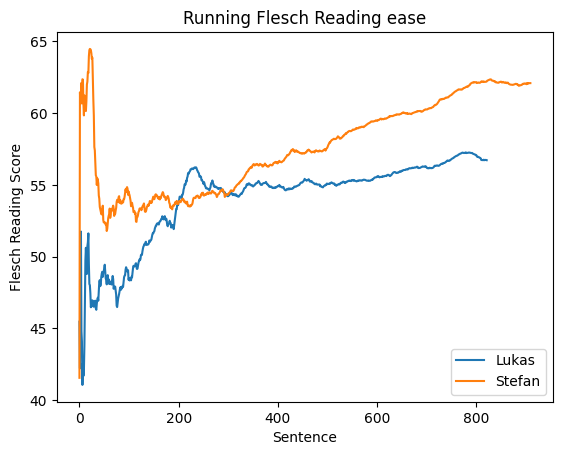

In [12]:
plt.plot(running_fre_scores.keys(), running_fre_scores.values(), label = "Lukas")
plt.plot(running_fre_scores2.keys(), running_fre_scores2.values(), label = "Stefan")
plt.title("Running Flesch Reading ease")
plt.xlabel('Sentence')
plt.ylabel('Flesch Reading Score')
plt.legend()
plt.show()